## Deep Learning 101 : Multilayer Perceptrons 
In this tutorial we'll go over the basics of fitting neural networks in python, using keras and tensorflow. You'll need to have them both installed to be able to run this tutorial. Key take aways are to become familiar with the keras API and nomenclature and understand how MLPs relate to logistic regression. 

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.datasets import make_circles

from keras.layers import Input, Dense
from keras.models import Sequential

import keras
keras.__version__

Using TensorFlow backend.


'2.0.8'

In [2]:
X, y = make_circles(n_samples=5000, factor=.3, noise=.20)
X_train = X[:4000]
y_train = y[:4000]

X_val = X[4000:]
y_val = y[4000:]
num_variables = X.shape[1]

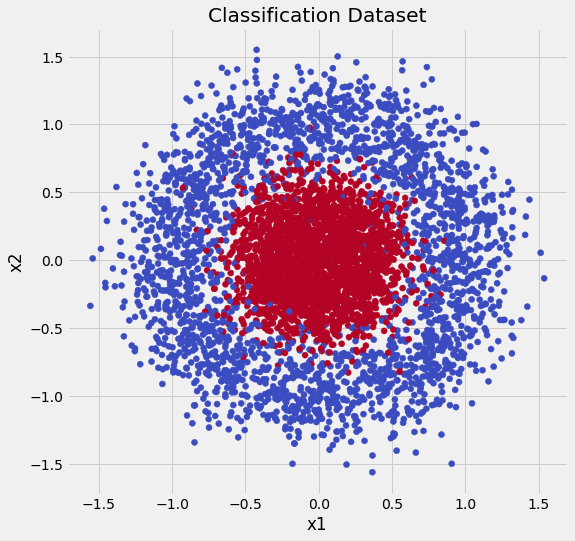

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.coolwarm)
plt.title("Classification Dataset")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## A first model with logistic regression 

The first thing we have to do is to set up an input tensor. One the key advantages of using keras is that you only have to specify the shapes for the inputs and outputs, the shapes for the remaining tensors will be inferred automatically. 

In our case, each input vector $x_i = <x_{i1},x_{i2}>$ has two dimensions and the output is a single binary variable $y_i \in \{0,1\}$. Let's see how we would set this up with keras:

In [4]:
logreg = Sequential()
logreg.add(Dense(units=1, input_dim=num_variables, activation='sigmoid'))
logreg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


The first line tells keras to initialze a new __sequential__ model. Sequential models take a single input tensor and produce a single output tensor. For the purposes of this tutorial, we're going to stick with the sequential model because it will have all of the functionality we'll need.

The bulk of the action happens on the second line, and it's a litte terse so let's unpack it:

- `logreg.add` tells keras that we want to add a new layer to our network.
- `Dense` specifies that we want to use a fully-connected layer, aka a dense layer and is probably most opaque aspect of the keras API. In general, what a dense layer does create several different linear combinations of the output of the previous layer, followed by an element-wise application of an __activation function__. The number of linear combinations is specified by the number of 'hidden units' in the layer, which in this case is specified by `output_dim`.
- `input_dim=num_variables` - Since this is the first layer in our network, we have to tell keras how big the input will be. In this case 
- `activation='sigmoid'` specifies which element-wise transformation we should apply the resulting output. Here we've specified a sigmoid transformation, which is given by $\frac{1}{1 + \exp(-t)}$, where $t$ is the result of the linear combination. This function 'squashes' the weighted sum to be a number between 0 and 1. 

Putting that all together, we are telling keras that we'd like a single linear combination of the input variables, followed by a sigmoid transformation, which will represent the probability that an observation belongs to the class $y=1$. In this case, the __Dense__ layer will have 2 parameters/weights $\{w_1,w_2\}$ and intercept/bias term $w_0$ since this is included by default. 

Since this is a relatively simple case, we can write out the actual function implied by this model. It looks like this:
<center>
$ 
\frac{1}{1 + \exp(-(w0 + w1*x_{i1} + w2*x_{i2}))}
$
</center>

As you might be able to see now, this is equivalent to a logistic regression model, where we are modeling the log-odds as linear function of the input variables.

Enough talking, let's fit the model! That's easily enough accomplished in another 2 lines:

In [5]:
logreg.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
logreg.fit(X_train, y_train,validation_data=[X_val,y_val],verbose=0)
val_score = logreg.evaluate(X_val,y_val,verbose=0)
print ("Accuracy on validation data: " + str(val_score[1]*100) + "%")

Accuracy on validation data: 54.4%


In [6]:
def plot_prediction(model,title):# create a mesh to plot in
    h = 0.02
    x_min, x_max = X_val[:, 0].min(), X_val[:, 0].max()
    y_min, y_max = X_val[:, 1].min(), X_val[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

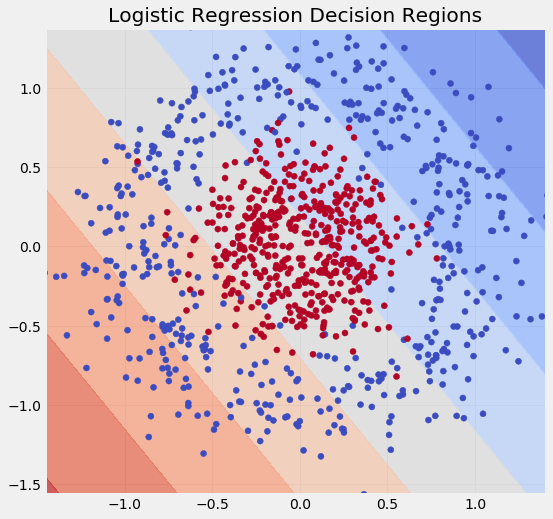

In [7]:
plot_prediction(logreg,"Logistic Regression Decision Regions")

<h2>Adding a new dense layer</h2>

In [8]:
num_hidden = 15
mlp = Sequential()
mlp.add(Dense(units=num_hidden, input_dim=num_variables, activation='relu'))
mlp.add(Dense(units=1, activation='sigmoid'))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                45        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [9]:
mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlp.fit(X_train, y_train,validation_data=[X_val,y_val],epochs=10,verbose=1)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s - loss: 0.6856 - acc: 0.5323 - val_loss: 0.6551 - val_acc: 0.6050
Epoch 2/10
4000/4000 [==============================] - 0s - loss: 0.6329 - acc: 0.7145 - val_loss: 0.6052 - val_acc: 0.8090
Epoch 3/10
4000/4000 [==============================] - 0s - loss: 0.5817 - acc: 0.8380 - val_loss: 0.5540 - val_acc: 0.8710
Epoch 4/10
4000/4000 [==============================] - 0s - loss: 0.5288 - acc: 0.8835 - val_loss: 0.5046 - val_acc: 0.8910
Epoch 5/10
4000/4000 [==============================] - 0s - loss: 0.4788 - acc: 0.9035 - val_loss: 0.4568 - val_acc: 0.9120
Epoch 6/10
4000/4000 [==============================] - 0s - loss: 0.4286 - acc: 0.9260 - val_loss: 0.4086 - val_acc: 0.9370
Epoch 7/10
4000/4000 [==============================] - 0s - loss: 0.3804 - acc: 0.9440 - val_loss: 0.3634 - val_acc: 0.9410
Epoch 8/10
4000/4000 [==============================] - 0s - loss: 0.3370 - a

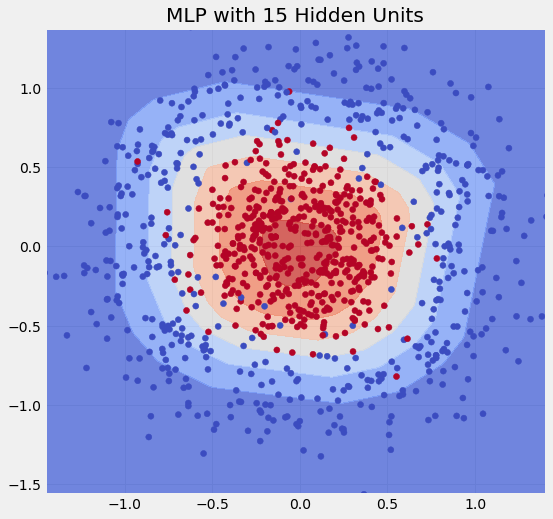

In [10]:
plot_prediction(mlp,"MLP with " + str(num_hidden) + " Hidden Units")

We can see that a neural network with 5 hidden units is trying to stitch together a relatively boxy set of lines to create piecewise linear functions in an effort to classify the points.

In [11]:
num_hidden = 128
mlp = Sequential()
mlp.add(Dense(units=num_hidden, input_dim=num_variables, activation='relu'))
mlp.add(Dense(units=1, activation='sigmoid'))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [12]:
mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlp.fit(X_train, y_train,validation_data=[X_val,y_val],epochs=10,verbose=1)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s - loss: 0.6160 - acc: 0.6488 - val_loss: 0.5356 - val_acc: 0.8830
Epoch 2/10
4000/4000 [==============================] - 0s - loss: 0.4525 - acc: 0.9273 - val_loss: 0.3762 - val_acc: 0.9450
Epoch 3/10
4000/4000 [==============================] - 0s - loss: 0.3082 - acc: 0.9550 - val_loss: 0.2626 - val_acc: 0.9470
Epoch 4/10
4000/4000 [==============================] - 0s - loss: 0.2231 - acc: 0.9560 - val_loss: 0.2038 - val_acc: 0.9500
Epoch 5/10
4000/4000 [==============================] - 0s - loss: 0.1794 - acc: 0.9557 - val_loss: 0.1763 - val_acc: 0.9550
Epoch 6/10
4000/4000 [==============================] - 0s - loss: 0.1552 - acc: 0.9562 - val_loss: 0.1568 - val_acc: 0.9530
Epoch 7/10
4000/4000 [==============================] - 0s - loss: 0.1407 - acc: 0.9573 - val_loss: 0.1479 - val_acc: 0.9540
Epoch 8/10
4000/4000 [==============================] - 0s - loss: 0.1314 - a

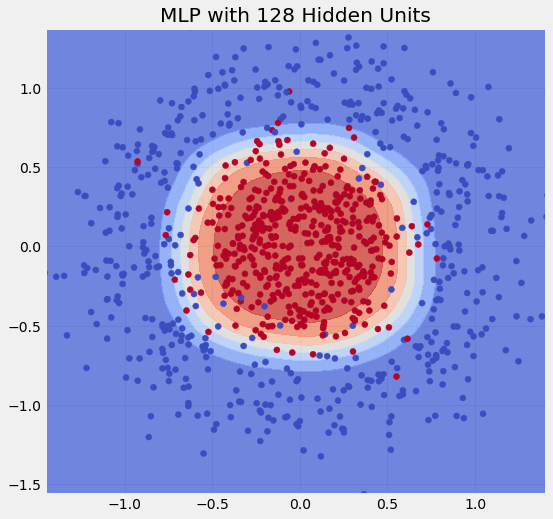

In [13]:
plot_prediction(mlp,"MLP with " + str(num_hidden) + " Hidden Units")

Not that we need to for this example, but we can easily extend this model to add more layers, simply by adding another dense layer. 

In [14]:
mlp = Sequential()
mlp.add(Dense(units=num_hidden, input_dim=num_variables, activation='relu'))
mlp.add(Dense(units=num_hidden, activation='relu'))
mlp.add(Dense(units=1, activation='sigmoid'))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [15]:
                        
mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlp.fit(X_train, y_train,validation_data=[X_val,y_val],epochs=50,verbose=1)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s - loss: 0.4470 - acc: 0.7652 - val_loss: 0.2098 - val_acc: 0.9560
Epoch 2/50
4000/4000 [==============================] - 0s - loss: 0.1345 - acc: 0.9577 - val_loss: 0.1360 - val_acc: 0.9530
Epoch 3/50
4000/4000 [==============================] - 0s - loss: 0.1138 - acc: 0.9535 - val_loss: 0.1398 - val_acc: 0.9440
Epoch 4/50
4000/4000 [==============================] - 0s - loss: 0.1100 - acc: 0.9565 - val_loss: 0.1284 - val_acc: 0.9560
Epoch 5/50
4000/4000 [==============================] - 0s - loss: 0.1125 - acc: 0.9555 - val_loss: 0.1224 - val_acc: 0.9570
Epoch 6/50
4000/4000 [==============================] - 0s - loss: 0.1093 - acc: 0.9567 - val_loss: 0.1316 - val_acc: 0.9530
Epoch 7/50
4000/4000 [==============================] - 0s - loss: 0.1090 - acc: 0.9580 - val_loss: 0.1252 - val_acc: 0.9560
Epoch 8/50
4000/4000 [==============================] - 0s - loss: 0.1102 - a

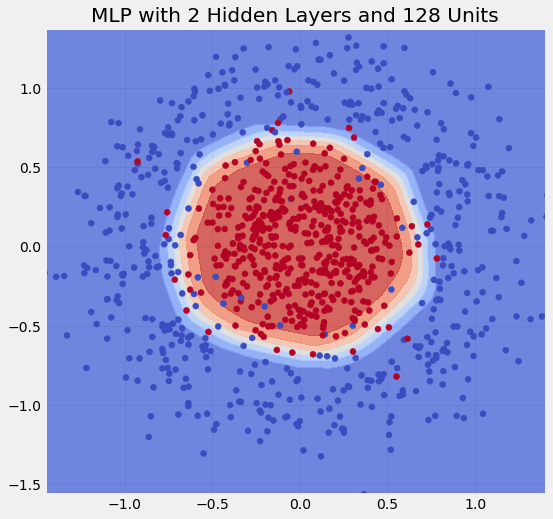

In [16]:
plot_prediction(mlp,"MLP with 2 Hidden Layers and " + str(num_hidden) + " Units")

That's it for this tutorial. Hopefully it helped you get a handle on how to use the keras API to build some simple neural networks. In the next one, we'll go over how to use this same approach to build convolutional models.

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [18]:
iris.data.shape

(150, 4)

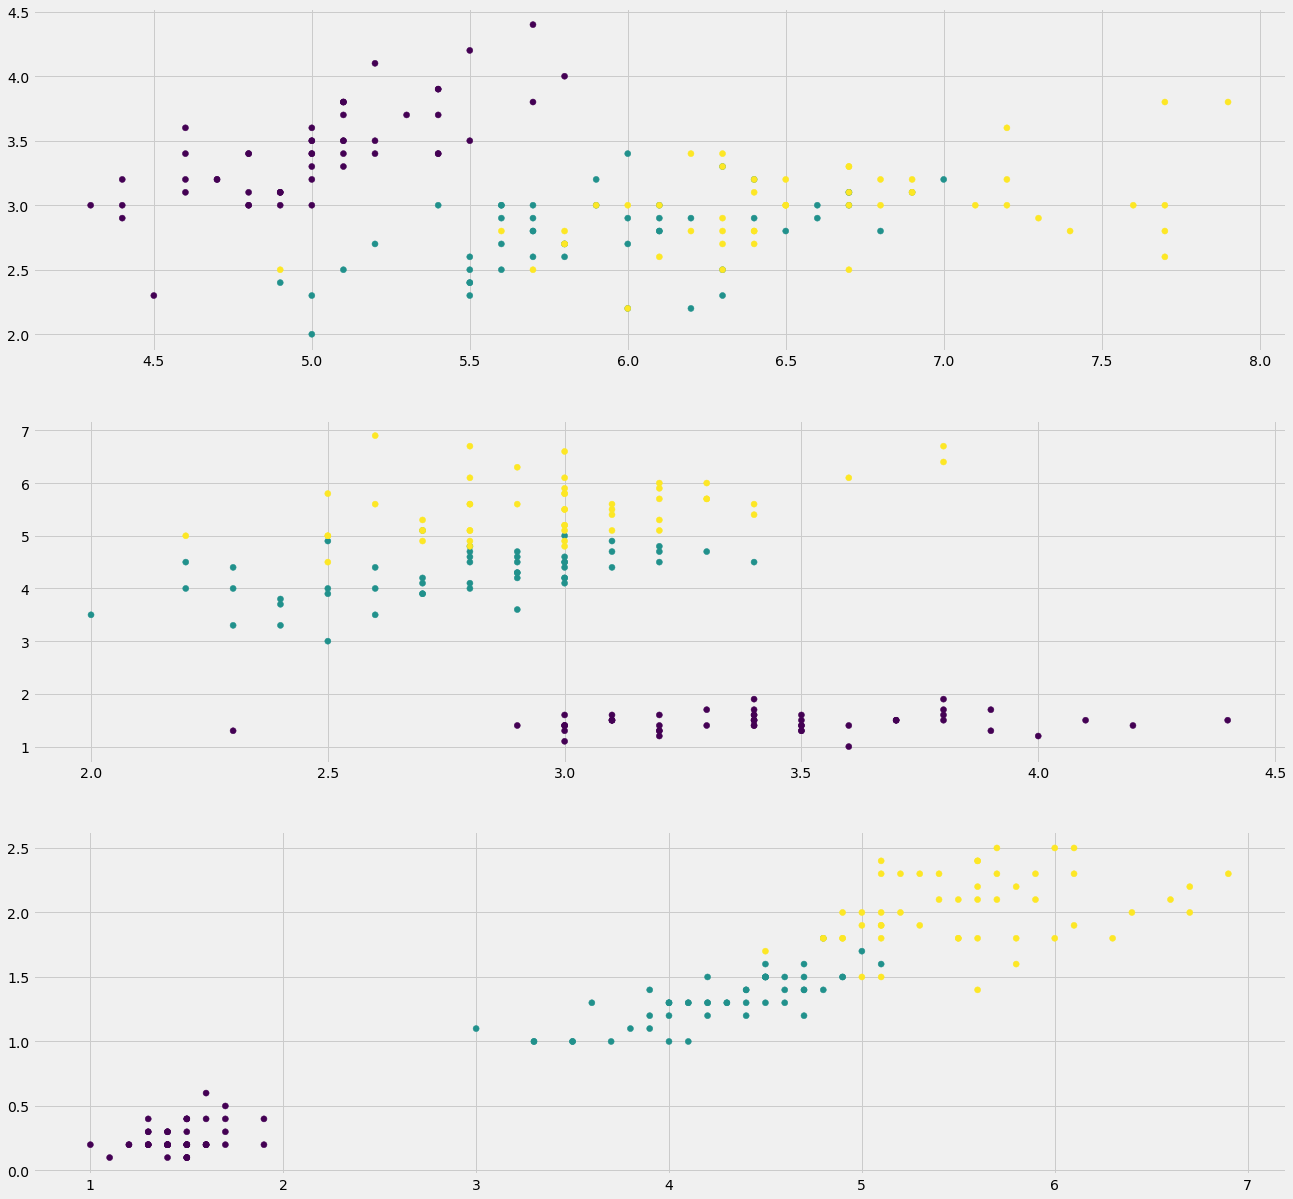

In [19]:
fig, ax = plt.subplots(3,figsize=(20,20))
for i in range(0,3):
    ax[i].scatter([d[i]  for d in iris.data],[d[i+1]  for d in iris.data],c=iris.target,cmap=plt.cm.viridis,marker='o')
plt.show()

In [20]:
import numpy
num_variables=3
indices = numpy.random.permutation(iris.data.shape[0])
sp=len(indices)*80//100
train_idx, val_idx = indices[:sp], indices[sp:]
X_train, X_val = iris.data[train_idx,:], iris.data[val_idx,:]
y_train, y_val = iris.target[train_idx], iris.target[val_idx]

num_variables = X_train.shape[1]
print(num_variables)

4


In [21]:
X_train[1:5,0:4]

array([[ 6.9,  3.1,  5.4,  2.1],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 5.1,  3.4,  1.5,  0.2],
       [ 6.2,  2.2,  4.5,  1.5]])

In [22]:
y_train[1:5]

array([2, 0, 0, 1])

In [31]:
num_hidden = 100
mlp = Sequential()
mlp.add(Dense(units=num_hidden, input_dim=num_variables, activation='relu'))
mlp.add(Dense(units=num_hidden, activation='relu'))
mlp.add(Dense(units=1, activation='sigmoid'))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 10,701
Trainable params: 10,701
Non-trainable params: 0
_________________________________________________________________


In [32]:
mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlp.fit(X_train, y_train,validation_data=[X_val,y_val],epochs=10,verbose=1)


Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 0s - loss: 0.6397 - acc: 0.5000 - val_loss: 0.1432 - val_acc: 0.3000
Epoch 2/10
120/120 [==============================] - 0s - loss: -0.0352 - acc: 0.3500 - val_loss: -0.3081 - val_acc: 0.3000
Epoch 3/10
120/120 [==============================] - 0s - loss: -0.4261 - acc: 0.3417 - val_loss: -0.6174 - val_acc: 0.3000
Epoch 4/10
120/120 [==============================] - 0s - loss: -0.7730 - acc: 0.3417 - val_loss: -0.9041 - val_acc: 0.3000
Epoch 5/10
120/120 [==============================] - 0s - loss: -1.0178 - acc: 0.3417 - val_loss: -1.1964 - val_acc: 0.3000
Epoch 6/10
120/120 [==============================] - 0s - loss: -1.3517 - acc: 0.3417 - val_loss: -1.5007 - val_acc: 0.3000
Epoch 7/10
120/120 [==============================] - 0s - loss: -1.6466 - acc: 0.3417 - val_loss: -1.8293 - val_acc: 0.3000
Epoch 8/10
120/120 [==============================] - 0s - loss: -2.0033 - acc: 0.

In [33]:
from keras.utils import to_categorical
nb_classes=len(iris.target_names)
cy_train = to_categorical(y_train,nb_classes )
cy_val = to_categorical(y_val,nb_classes)

In [34]:
cy_train[1:5]

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [39]:
from keras.layers import Dropout
num_hidden = 200
mlp = Sequential()
mlp.add(Dense(units=num_hidden, input_dim=num_variables, activation='tanh'))
mlp.add(Dense(units=num_hidden, activation='relu'))
#mlp.add(Dropout(0.2))
mlp.add(Dense(units=nb_classes, activation='sigmoid'))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_28 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 303       
Total params: 10,903
Trainable params: 10,903
Non-trainable params: 0
_________________________________________________________________


In [40]:
mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlp.fit(X_train, cy_train,validation_data=[X_val,cy_val],epochs=20,verbose=1)



Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s - loss: 0.6660 - acc: 0.6083 - val_loss: 0.5668 - val_acc: 0.7889
Epoch 2/20
120/120 [==============================] - 0s - loss: 0.5593 - acc: 0.7111 - val_loss: 0.5335 - val_acc: 0.6667
Epoch 3/20
120/120 [==============================] - 0s - loss: 0.5340 - acc: 0.6667 - val_loss: 0.5031 - val_acc: 0.6667
Epoch 4/20
120/120 [==============================] - 0s - loss: 0.4997 - acc: 0.6750 - val_loss: 0.4661 - val_acc: 0.8000
Epoch 5/20
120/120 [==============================] - 0s - loss: 0.4665 - acc: 0.8000 - val_loss: 0.4350 - val_acc: 0.8778
Epoch 6/20
120/120 [==============================] - 0s - loss: 0.4399 - acc: 0.8528 - val_loss: 0.4038 - val_acc: 0.8889
Epoch 7/20
120/120 [==============================] - 0s - loss: 0.4141 - acc: 0.8611 - val_loss: 0.3772 - val_acc: 0.8889
Epoch 8/20
120/120 [==============================] - 0s - loss: 0.3910 - acc: 0.8667 - val_lo